# Exercise 3: Diffusion and Dodson's equations (20 points)

In the exercise for this week we will explore the diffusion equation and how it can be applied to understand ages from thermochronology.

### Tips for completing this exercise

- Use **exactly** the same variable names as in the instructions because your answers will be automatically graded, and the tests that grade your answers rely on following the same formatting or variable naming as in the instructions.
- **Please do not**:

    - **Change the file names**. Do all of your editing in the provided `Exercise-3-problems-1-2.ipynb` file (this file).
    - **Copy/paste cells in this notebook**. We use an automated grading system that will fail if there are copies of code cells.
    - **Change the existing cell types**. You can add cells, but changing the cell types for existing cells (from code to markdown, for example) will also cause the automated grader to fail.

## AI tool usage agreement

**Enter your name in the cell below** to confirm that you have followed the [course guidelines on the use of AI tools](https://introqg-site.readthedocs.io/en/latest/general-info/ai-tools.html) and understand that misuse of AI tools is considered cheating.

Name: Qi-fan Wu

## Problem 1: Investigating diffusion behaviors in space and time (6 points)

In this first problem we will explore how diffusion profiles are affected by the timescale of diffusion and the diffusivity. 

The general form of the diffusion equation in 1D without any sources is

$$
\large
\frac{\partial c}{\partial t} = D \frac{\partial^{2}c}{\partial x^{2}}
$$
*Equation 1. The diffusion equation without sources.*

where $c$ is the concentration of the diffusing material (isotope concentration, heat, etc.), $t$ is time, $D$ is the diffusion constant (or diffusivity), and $x$ is the spatial coordinate.

Let's now consider an example where

- the initial concentration of the diffusing material at x < 0 is 1.0
- the initial concentration of the diffusing material at x > 0 is 0.0
- the concentration $c_{0}$ at x = 0 is 0.5 (the average of the concentrations on either side)

In this case, we can find a solution in the form

$$
\large
c(x, t) = c_{0} \mathrm{erfc}{\left(\frac{x}{2 \sqrt{D t}} \right)}
$$
*Equation 2. A solution to the diffusion equation for the conditions above.*

where $\mathrm{erfc}$ is the complementary error function.

This will allow us to explore how diffusion affects the concentration on either side of x = 0 as a function of time and diffusivity.

### Scores for this problem

**Your score on this problem will be based on following criteria**:

- Calculating the diffusion profiles for various times and diffusivities
- Plotting your results to display how the profiles vary
- Including comments that explain what most lines in the code do
- Uploading your notebook to your GitHub repository for this week's exercise

### Part 1: Exploring diffusion behavior (1 point)

To start, we can calculate the concentrations of the diffusing material using Equation 2 for a series of times.

- Calculate the diffusion profile at the following times:

    - 0.1 (`concentration_0`)
    - 6.0 (`concentration_6`)
    - 12.0 (`concentration_12`)
    - 18.0 (`concentration_18`)

- For each time you should use the following values:

    - A concentration $c_{0}$ at x = 0 of 0.5
    - A range of x values from -10.0 to 10.0 in 201 steps
    - A constant diffusivity of D = 1.0

**Hints**:
1. You can use a function for this, but you do not need to
2. The complementary error function is available in the SciPy package and can be used as `erfc()` below

In [1]:
import numpy as np
!pip install scipy  #pip install scipy
from scipy.special import erfc

concentration_0 = None
concentration_6 = None
concentration_12 = None
concentration_18 = None

# YOUR CODE HERE
# Constants
c0 = 0.5  # concentration at x = 0
D = 1.0   # diffusivity
x = np.linspace(-10.0, 10.0, 201)  # Range of x, 201 points from -10.0 to 10.0
# Calculate concentrations for different times
concentration_0 = c0 * erfc(x / (2 * np.sqrt(D * 0.1)))
concentration_6 = c0 * erfc(x / (2 * np.sqrt(D * 6.0)))
concentration_12 = c0 * erfc(x / (2 * np.sqrt(D * 12.0)))
concentration_18 = c0 * erfc(x / (2 * np.sqrt(D * 18.0)))
#raise NotImplementedError()

In [2]:
# The print statements below should work
print(f"Concentration at index 88 after time  0.1: {concentration_0[88]:.4f}. Expected value: 0.9964.")
print(f"Concentration at index 88 after time  6.0: {concentration_6[88]:.4f}. Expected value: 0.6355.")
print(f"Concentration at index 88 after time 12.0: {concentration_12[88]:.4f}. Expected value: 0.5968.")
print(f"Concentration at index 88 after time 18.0: {concentration_18[88]:.4f}. Expected value: 0.5793.")


Concentration at index 88 after time  0.1: 0.9964. Expected value: 0.9964.
Concentration at index 88 after time  6.0: 0.6355. Expected value: 0.6355.
Concentration at index 88 after time 12.0: 0.5968. Expected value: 0.5968.
Concentration at index 88 after time 18.0: 0.5793. Expected value: 0.5793.


### Part 2: Plotting diffusion behavior (2 points)

Here we can create a plot of the four diffusion profiles calculated above.

- Using Matplotlib, create a line plot with the distance x on the x-axis and concentration on the y-axis
    - You can create the figure and plots using `fig, ax = plt.subplots(1, 1, figsize=(8, 6))`, which will create a figure with a single set of plot axes and a size of 8 inches wide by 6 inches tall
    - The concentrations for all four times should be on the same plot
        - You should use the `label` parameter in the plot function to give the lines a label for the legend
- Be sure to display the legend, and include axis labels and a title
- Also add a figure caption in the Markdown cell below the plot that describes it as if it was in a scientific journal article

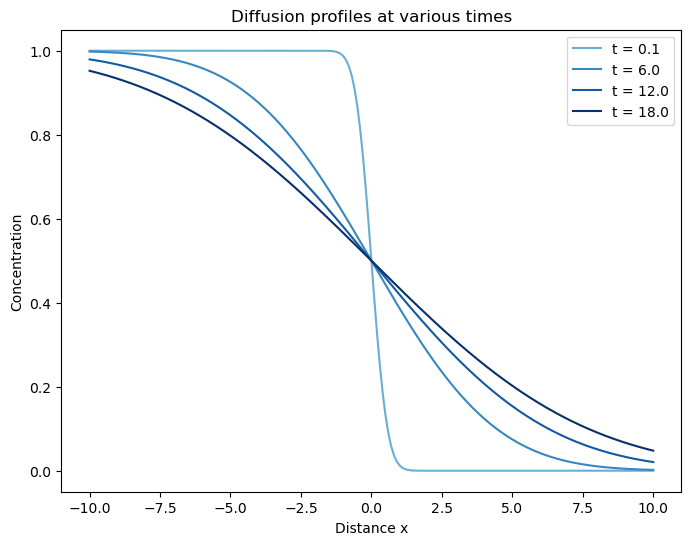

In [3]:
import matplotlib.pyplot as plt

# Create your plot below

# YOUR CODE HERE
# Create the figure and plot axes
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
import matplotlib.cm as cm
colors = cm.Blues(np.linspace(0.5, 1, 4))  
# Plotting the concentration profiles
ax.plot(x, concentration_0, label='t = 0.1', color=colors[0])
ax.plot(x, concentration_6, label='t = 6.0', color=colors[1])
ax.plot(x, concentration_12, label='t = 12.0', color=colors[2])
ax.plot(x, concentration_18, label='t = 18.0', color=colors[3])
# Adding labels and title
ax.set_xlabel('Distance x')
ax.set_ylabel('Concentration')
ax.set_title('Diffusion profiles at various times')
# Show the legend
ax.legend()
# Show the plot
plt.show()
#raise NotImplementedError()

**Figure Caption:** The graph displays diffusion profiles of a material at four different time intervals, represented by varying shades of blue lines. Each line depicts the concentration gradient as a function of distance at a given time, showing the transition from an initial step function distribution at t = 0.1 to increasingly smooth profiles at later times. The concentration is initially 1.0 for x < 0 and 0.0 for x > 0, with an intermediate value of 0.5 at x = 0. As time progresses, the diffusion process gradually diminishes the concentration gradient, exemplifying the tendency toward equilibrium. The steepest gradient is observed at t = 0.1, with the slope decreasing at each successive time interval, reflecting the diffusive spread of material through the medium.

### Part 3: Exploring diffusion behavior again (1 point)

Here we will repeat what was done in Part 1, but for different diffusity values rather than different times.

- Calculate the diffusion profile at the following diffusivities:

    - 0.1 (`diffusivity_0`)
    - 1.0 (`diffusivity_1`)
    - 10.0 (`diffusivity_10`)

- For each time you should use the following values:

    - A concentration $c_{0}$ at x = 0 of 0.5
    - A range of x values from -10.0 to 10.0 in 201 steps
    - A time of 6.0

**Note**: The calculated values for `diffusivity_1` are the same as `concentration_6` from Part 1.

In [4]:
diffusivity_0 = None
diffusivity_1 = None
diffusivity_10 = None

# YOUR CODE HERE
# Constants
c0 = 0.5  # concentration at x = 0
time = 6.0  # time
# Range of x values
x = np.linspace(-10.0, 10.0, 201)  # 201 points from -10.0 to 10.0
# Calculate concentrations for different diffusivities
diffusivity_0 = c0 * erfc(x / (2 * np.sqrt(0.1 * time)))
diffusivity_1 = c0 * erfc(x / (2 * np.sqrt(1.0 * time)))  # the same as concentration_6 from Part 1
diffusivity_10 = c0 * erfc(x / (2 * np.sqrt(10.0 * time)))
#raise NotImplementedError()

In [5]:
# The print statements below should work
print(f"Concentration at index 88 for diffusivity  0.1: {diffusivity_0[88]:.4f}. Expected value: 0.8633.")
print(f"Concentration at index 88 for diffusivity  1.0: {diffusivity_1[88]:.4f}. Expected value: 0.6355.")
print(f"Concentration at index 88 for diffusivity 10.0: {diffusivity_10[88]:.4f}. Expected value: 0.5436.")


Concentration at index 88 for diffusivity  0.1: 0.8633. Expected value: 0.8633.
Concentration at index 88 for diffusivity  1.0: 0.6355. Expected value: 0.6355.
Concentration at index 88 for diffusivity 10.0: 0.5436. Expected value: 0.5436.


### Part 4: Plotting diffusion behavior again (2 points)

Now we can again plot our results as we did in Part 2, but now for the different diffusivities.

- Using Matplotlib, create a line plot with the distance x on the x-axis and concentration on the y-axis
    - You can create the figure and plots using `fig, ax = plt.subplots(1, 1, figsize=(8, 6))`, which will create a figure with a single set of plot axes and a size of 8 inches wide by 6 inches tall
    - The concentrations for all three diffusivities should be on the same plot
        - You should use the `label` parameter in the plot function to give the lines a label for the legend
- Be sure to display the legend, and include axis labels and a title
- Also add a figure caption in the Markdown cell below the plot that describes it as if it was in a scientific journal article

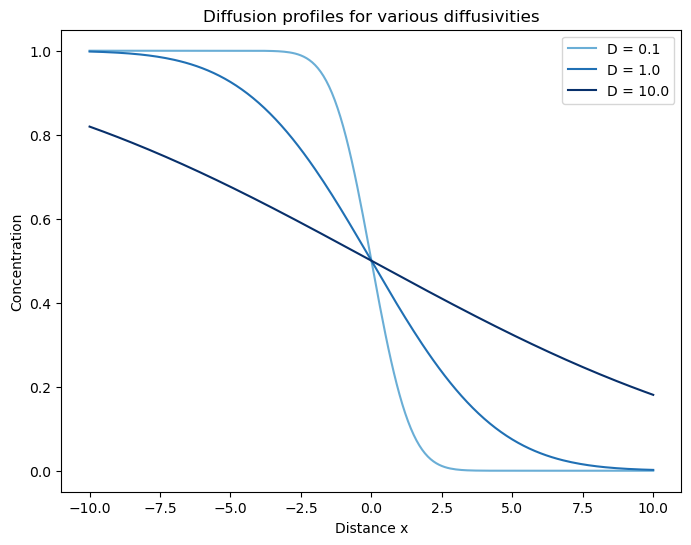

In [6]:
import matplotlib.pyplot as plt

# Create your plot below

# YOUR CODE HERE
# the gradient blue colors
colors = plt.cm.Blues(np.linspace(0.5, 1, 3))
# Create the figure and axes for the plot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# Plot the concentration profiles for different diffusivities
ax.plot(x, diffusivity_0, label='D = 0.1', color=colors[0])
ax.plot(x, diffusivity_1, label='D = 1.0', color=colors[1])
ax.plot(x, diffusivity_10, label='D = 10.0', color=colors[2])
# Add labels and title
ax.set_xlabel('Distance x')
ax.set_ylabel('Concentration')
ax.set_title('Diffusion profiles for various diffusivities')
# Display the legend
ax.legend()
# Show the plot
plt.show()
#raise NotImplementedError()

**Figure Caption:** This graph presents the diffusion profiles of a substance for three different values of diffusivity (D = 0.1, 1.0, and 10.0) over a spatial domain ranging from -10 to 10 units. The lines represent the concentration profiles at a fixed time of t = 6.0 for increasing diffusivities. As diffusivity increases, the spread of the substance becomes wider, flattening the concentration profile and indicating more efficient diffusion across space. The concentration transition from 1.0 to 0.0 becomes less abrupt as diffusivity increases, highlighting the enhanced mixing and homogenization effect of higher diffusivity on the substance's distribution.

## Problem 2: Calculating thermochronometer closure temperatures (14 points)

In this problem you will create a function for calculating an effective closure temperature using Dodson's equations and then apply that equation to several different scenarios. In the function, you will need to calculate both of the values below.

$$
\large
T_{\mathrm{c}} = \frac{E_{\mathrm{a}}}{R \ln \left( A \tau D_{0} / a^{2} \right)}
$$

*Equation 3. The effective closure temperature according to Dodson's method.*

where $T_{\mathrm{c}}$ is the effective closure temperature, $E_{\mathrm{a}}$ is the activation energy, $R$ is the universal gas constant, $A$ is a geometric factor ($A = 25$ for a sphere, $A = 27$ for a cylinder, and $A = 8.7$ for a planar sheet), $\tau$ is time for the diffusivity to decrease by a factor of 1/e, $D_{0}$ is the diffusivity at infinite temperature and $a$ is the diffusion domain (we'll assume this is the size of the mineral).
The value of $\tau$ can be calculated as a function of the cooling rate $dT/dt$

$$
\large
\tau = -\frac{R T^{2}}{E_{\mathrm{a}} dT/dt}
$$

*Equation 4. The characteristic time for a change in diffusivity.*

Using both equations above it is possible to determine an effective closure temperature by iterating to find the values of $T_{\mathrm{c}}$ and $\tau$.

### Scores for this problem

**Your score on this problem will be based on following criteria**:

- Creating a new function called `dodson()` and saving it adding it to your `introqg_functions.py` script file from Exercise 2
- Calculating effective closure temperatures for different cooling rates, grain sizes, and thermochronometers
- Plotting your results
- Including comments that explain what most lines in the code do
- Uploading your notebook **and script file** to your GitHub repository for this week's exercise

### Part 0: Copying and testing your script file from Exercise 2 (0 points)

The first task in this problem is to copy your `introqg_functions.py` script file from Exercise 2 to the directory containing this notebook and then run the cell below to ensure it has been copied and is functioning as expected. Note: We will only check some of the functions in this file using the tests below, not all of them.

- Copy your `introqg_functions.py` script file from Exercise 2 to the directory containing this notebook
- Run the tests below

In [7]:
# These tests with a small list should work
from nose.tools import assert_equal
from introqg_functions import linregress, chi_squared

# Test mean function with some lists
list1 = [4, 2, 8, -2, -10]
list2 = [3, 5, 1, -2, -3]
list3 = [1, 2, 2, 1, 2]

# Calculate linear regression
A, B = linregress(list1, list2)

# Calculate chi-squared
chi = chi_squared(list1, list2, list3)

# Print test values
print(f"Linear regression y-intercept: {A:.3f}.")
print(f"Linear regression slope: {B:.3f}.")
print(f"Chi-squared value: {chi:.3f}")

# Check that the mean values are correct
assert_equal(round(A, 3), 0.667)
assert_equal(round(B, 3), 0.333)
assert_equal(round(chi, 3), 5.550)

# Print message if it is safe to continue
print("\nAll tests pass! You are ready to proceed with this exercise.")

Linear regression y-intercept: 0.667.
Linear regression slope: 0.333.
Chi-squared value: 27.750


AssertionError: 27.75 != 5.55

### Part 1: Converting Dodson's equations to a function (4 points)

The first task in this problem is to create a function called `dodson()` that calculates an effective closure temperature using Equations 3 and 4 above.

In the function, you will pass in the following values, and you should use the same name for the parameters in your `dodson()` function:

- `cooling_rate` (units: °C / Myr; **Note**: should be a negative number)
- `activation_energy` (units: J / mol)
- `diffusivity_inf` (units: m$^{2}$ / s)
- `grain_radius` (units: $\mu$m)
- `geometry_factor` (units: none)

**NOTE**: The equation for $T_{\mathrm{c}}$ requires you know the value of $\tau$, and the equation to calculate $\tau$ requires a value for $T$, for which we will use $T_{\mathrm{c}}$. This might seem like an impossible situation with two equations that require values from each other, but the simple solution here is to use a `for` loop to iterate and calculate the value of both $T_{\mathrm{c}}$ and $\tau$ until the calculated value for $T_{\mathrm{c}}$ converges. This should happen in no more than 10 iterations in your `for` loop. If you are looking for a challenge, you can also use a `while` loop to calculate the effective closure temperature, but to do this you will need to keep track of the difference in the calculated closure temperature and check that it converges (stops changing).

**Hints**

1. Define the gas constant as a variable inside your function. There is no need to pass it, since it is a constant.
2. We suggest you calculate the value of $\tau$ and then $T_{\mathrm{c}}$ in your loop. This is just a recommendation.
    - If you calculate $\tau$ first in your loop, you should also define the initial "guess" for the closure temperature inside your function before your `for` loop. This will allow you to calculate $\tau$ during the first iteration before you calculate $T_{\mathrm{c}}$ the first time.
        - We recommend an initial guess of something like 1000 Kelvins, just to make sure the first guess is higher than any calculated closure temperature.
3. The input units for `cooling_rate` and `grain_radius` will need to be converted to have time in seconds and distance in meters, respectively. Geological cooling rates are typically reported in °C / Myr and grain radii in micrometers, so to make the function easier to use it is helpful to convert units within the function.
4. Be aware that the calculated closure temperature will be in Kelvins, so you should convert that to degrees Celsius before returning the value from your function.

**What to do for this part:**

- Create a function called `dodson()` in your `introqg_functions.py` script file
    - Your function parameters should be `cooling_rate`, `activation_energy`, `diffusivity_inf`, `grain_radius`, and `geometry_factor` as described above

In [8]:
# Import your dodson function below

# YOUR CODE HERE
from introqg_functions import dodson
#raise NotImplementedError()

In [9]:
# The test below should work

from nose.tools import assert_equal
from introqg_functions import dodson

tc1 = dodson(
    cooling_rate=-1.0,
    activation_energy=138.0e3,
    diffusivity_inf=5.0e-3,
    grain_radius=100.0,
    geometry_factor=25
)

# Print calculated closure temperature
print(f"Calculated apatite (U-Th)/He closure temperature: {tc1:.3f} °C")

# Check that the closure temperature value is correct
assert_equal(round(tc1, 3), 63.237)

Calculated apatite (U-Th)/He closure temperature: 63.237 °C


In [10]:
# The test below should work

tc2 = dodson(
    cooling_rate=-10.0,
    activation_energy=138.0e3,
    diffusivity_inf=5.0e-3,
    grain_radius=100.0,
    geometry_factor=25
)

# Print calculated closure temperature
print(f"Calculated apatite (U-Th)/He closure temperature: {tc2:.3f} °C")

# Check that the closure temperature value is correct
assert_equal(round(tc2, 3), 79.016)

Calculated apatite (U-Th)/He closure temperature: 79.016 °C


In [11]:
# The test below should work

tc3 = dodson(
    cooling_rate=-10.0,
    activation_energy=168.0e3,
    diffusivity_inf=4.6e-5,
    grain_radius=100.0,
    geometry_factor=25
)

# Print calculated closure temperature
print(f"Calculated zircon (U-Th)/He closure temperature: {tc3:.3f} °C")

# Check that the closure temperature value is correct
assert_equal(round(tc3, 3), 198.619)

Calculated zircon (U-Th)/He closure temperature: 198.619 °C


In [12]:
# The test below should work

tc4 = dodson(
    cooling_rate=-10.0,
    activation_energy=264.0e3,
    diffusivity_inf=2.3e-4,
    grain_radius=500.0,
    geometry_factor=27
)

# Print calculated closure temperature
print(f"Calculated muscovite Ar/Ar closure temperature: {tc4:.3f} °C")

# Check that the closure temperature value is correct
assert_equal(round(tc4, 3), 486.500)

Calculated muscovite Ar/Ar closure temperature: 486.500 °C


### Part 2: Exploring Dodson's equations: Cooling rate (2 points)

Now that you have a working function for calculating closure temperatures, we can start exploring how Dodson's equations work. We will start this exploration by considering the effect of different cooling rates. You can use the other parameters listed below when doing these calculations. These are for calculating the (U-Th)/He age in apatite.

| Thermochronometer | $E_{\mathrm{a}}$      | $D_{0}$              | $a$     | $A$  |
|-------------------|:---------------------:|:--------------------:|:-------:|:----:|
| Apatite (U-Th)/He | $138.0 \times 10^{3}$ | $5.0 \times 10^{-3}$ | $100.0$ | $25$ |


- Create a NumPy array of cooling rates called `cooling_rates` that goes from `0.01` to `100.0` in `101` steps
    - We suggest you use the `np.logspace()` function for this because the plots we will produce will have a logarithmic x-axis. Using `np.logspace()` will keep the points where the calculations are done equally spaced when the x-axis has a logarithmic scale
        - For the `np.logspace()` function you give the starting and ending values as the base 10 log of the values. For example, a starting rate of 0.01 °C / Myr would be `-2` in the `np.logspace()` function because $10^{-2} = 0.01$. The same would apply for the ending value.
- Create an empty list called `closure_temps_rates` to store the closure temperature for each rate
- Loop over the rates in your `cooling_rates` list and append the closure temperature for each rate

In [13]:
# Create the closure temperature array and calculate the closure temps for each rate

import numpy as np

cooling_rates = None
closure_temps_rates = None

# YOUR CODE HERE
# Define parameters for Apatite (U-Th)/He
Ea = 138.0e3     # Activation energy in J/mol
D0 = 5.0e-3      # Diffusivity at infinite temperature in m^2/s
a = 100.0        # Grain radius in micrometers
A = 25           # Geometric factor for a sphere
# Create an array of cooling rates from 0.01 to 100.0 in 101 steps
cooling_rates = np.logspace(-2, 2, 101)  # Cooling rates in °C/Myr
# Initialize an empty list to store closure temperatures
closure_temps_rates = []
# Loop over each cooling rate and calculate the closure temperature
for rate in cooling_rates:
    # Note: Cooling rate needs to be negative as per Dodson's method
    tc = dodson(cooling_rate=-rate, activation_energy=Ea, diffusivity_inf=D0, grain_radius=a, geometry_factor=A)
    closure_temps_rates.append(tc)
# closure_temps_rates contains the closure temperatures for each cooling rate
#raise NotImplementedError()

In [14]:
# The test below should work
print(f"The cooling rates array starts with {cooling_rates[0]}, ends with {cooling_rates[-1]}, and has {len(cooling_rates)} values.")


The cooling rates array starts with 0.01, ends with 100.0, and has 101 values.


In [15]:
# The test below should work
print(f"The first closure temperatures is {closure_temps_rates[0]:.2f} °C and the last is {closure_temps_rates[-1]:.2f} °C.")


The first closure temperatures is 35.51 °C and the last is 96.31 °C.


### Part 3: Plotting Dodson's equations: Cooling rate (1.5 points)

With our new lists of closure temperatures we can now create a plot to help us understand how they vary for different cooling rates. The idea would be to simply plot the calculated closure temperature as a function of the cooling rate and visualize the trend.

- Using Matplotlib, create a line plot with the cooling rates on the x-axis and closure temperatures on the y-axis
    - You can create the figure and plots using `fig, ax = plt.subplots(1, 1, figsize=(8, 6))`, which will create a figure with a single set of plot axes and a size of 8 inches wide by 6 inches tall
    - You should scale the x-axis so that it has a log scale
        - You can search for how to do this online, or check out [hints for this week's exercise](https://introqg-site.readthedocs.io/en/latest/lessons/L3/exercise-3.html#general-hints-for-exercise-3) for help
- Be sure to include axis labels and a title
- Also add a figure caption in the Markdown cell below the plot that describes it as if it was in a scientific journal article

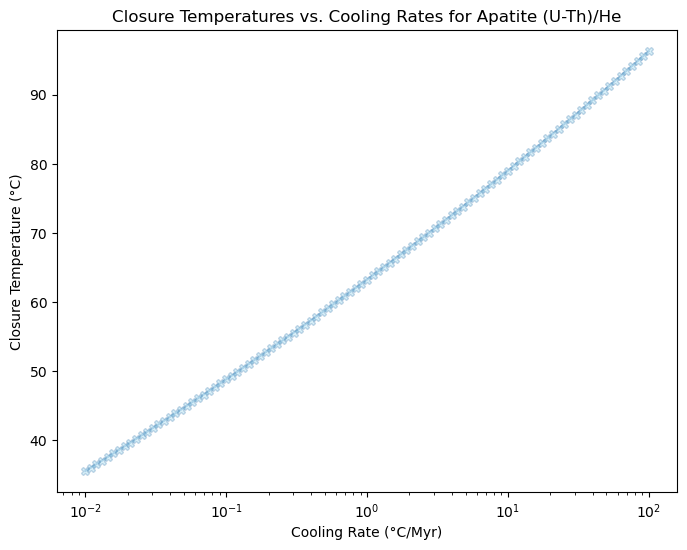

In [16]:
import matplotlib.pyplot as plt

# Create your plot below

# YOUR CODE HERE
# Create the figure and axes for the plot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# Plotting closure temperatures against cooling rates
ax.plot(cooling_rates, closure_temps_rates, marker='X', linestyle='-',markerfacecolor='skyblue', markeredgecolor='steelblue', alpha=0.3)
# Setting the x-axis to logarithmic scale
ax.set_xscale('log')
# Adding labels and title
ax.set_xlabel('Cooling Rate (°C/Myr)')
ax.set_ylabel('Closure Temperature (°C)')
ax.set_title('Closure Temperatures vs. Cooling Rates for Apatite (U-Th)/He')
# Show the plot
plt.show()
#raise NotImplementedError()

**Figure Caption:** The plot demonstrates the variation in closure temperature of apatite (U-Th)/He with respect to different cooling rates from 0.01 to 100 °C/Myr. The trend shows a positive correlation, indicating that as the cooling rate decreases, the closure temperature increases. This suggests that the geological cooling history can significantly influence the closure temperature and the thermal history reconstructed from thermochronological data.

### Part 4: Exploring Dodson's equations: Grain size (2 points)

The next factor we can explore is the grain size, keeping the cooling rate fixed now at 10 °C / Myr. We will again use the Apatite (U-Th)/He thermochronometer for grain sizes from 40 to 100 $\mu$m.

| Thermochronometer | $E_{\mathrm{a}}$      | $D_{0}$              | $a$    | $A$  |
|-------------------|:---------------------:|:--------------------:|:------:|:----:|
| Apatite (U-Th)/He | $138.0 \times 10^{3}$ | $5.0 \times 10^{-3}$ | varies | $25$ |


- Create a NumPy array of grain radii called `grain_radii` that goes from `40.0` to `100.0` in `101` steps
    - In this case you can use the `np.linspace()` function because the x-axis will have the normal linear scale
- Create an empty list called `closure_temps_radii` to store the closure temperature for each rate
- Loop over the rates in your `grain_radii` list and append the closure temperature for each rate

In [17]:
# Create the closure temperature array and calculate the closure temps for each rate

import numpy as np

grain_radii = None
closure_temps_radii = None

# YOUR CODE HERE
# Define parameters for Apatite (U-Th)/He
Ea = 138.0e3     # Activation energy in J/mol
D0 = 5.0e-3      # Diffusivity at infinite temperature in m^2/s
A = 25           # Geometric factor for a sphere
cooling_rate = -10.0 # Cooling rate in °C/Myr
# Create an array of grain radii from 40.0 to 100.0 micrometers in 101 steps
grain_radii = np.linspace(40.0, 100.0, 101)
# Initialize an empty list to store closure temperatures
closure_temps_radii = []
# Loop over each grain radius and calculate the closure temperature
for radius in grain_radii:
    tc = dodson(cooling_rate=cooling_rate, activation_energy=Ea, diffusivity_inf=D0, grain_radius=radius, geometry_factor=A)
    closure_temps_radii.append(tc)
# closure_temps_radii contains the closure temperatures for each grain radius
#raise NotImplementedError()

In [18]:
# The test below should work
print(f"The grain radii array starts with {grain_radii[0]}, ends with {grain_radii[-1]}, and has {len(grain_radii)} values.")


The grain radii array starts with 40.0, ends with 100.0, and has 101 values.


In [19]:
# The test below should work
print(f"The first closure temperatures is {closure_temps_radii[0]:.2f} °C and the last is {closure_temps_radii[-1]:.2f} °C.")


The first closure temperatures is 66.34 °C and the last is 79.02 °C.


### Part 5: Plotting Dodson's equations: Grain radius (1.5 points)

With our new lists of closure temperatures we can now create a plot to help us understand how they vary for different grain radii. The idea would be to simply plot the calculated closure temperature as a function of the grain radius and visualize the trend.

- Using Matplotlib, create a line plot with the grain radius on the x-axis and closure temperatures on the y-axis
    - You can create the figure and plots using `fig, ax = plt.subplots(1, 1, figsize=(8, 6))`, which will create a figure with a single set of plot axes and a size of 8 inches wide by 6 inches tall
    - You use a linear scale for the x-axis this time (this is the default behavior in Matplotlib)
- Be sure to include axis labels and a title
- Also add a figure caption in the Markdown cell below the plot that describes it as if it was in a scientific journal article

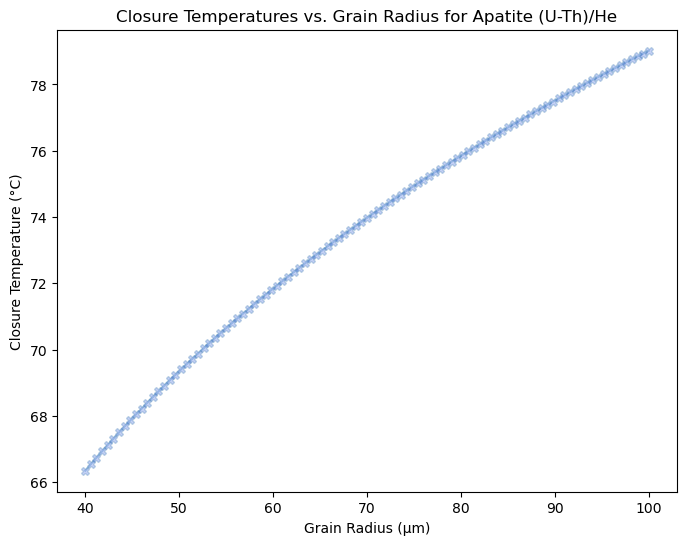

In [20]:
import matplotlib.pyplot as plt

# Create your plot below

# YOUR CODE HERE
# Create the figure and axes for the plot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# Plotting closure temperatures against grain radii
ax.plot(grain_radii, closure_temps_radii, marker='X', linestyle='-', markerfacecolor='royalblue', markeredgecolor='steelblue', alpha=0.3)
# Adding labels and title
ax.set_xlabel('Grain Radius (μm)')
ax.set_ylabel('Closure Temperature (°C)')
ax.set_title('Closure Temperatures vs. Grain Radius for Apatite (U-Th)/He')
# Show the plot
plt.show()
#raise NotImplementedError()

**Figure 4:** The scatter plot shows the closure temperatures for Apatite (U-Th)/He as a function of mineral grain radius, illustrating a positive correlation between grain size and closure temperature. As the grain radius increases from 40 to 100 micrometers, the closure temperature rises steadily, suggesting that larger grains retain radiogenic helium longer during cooling and thus recording higher closure temperatures. This graph emphasizes the significance of accounting for grain size when evaluating thermochronological data.

### Part 6: Exploring Dodson's equations: Thermochronometer system (1.5 points)

The final factor we can explore is the mineral system being used as a thermochronometer. Here we will compare the calculated effective closure temperatures for the apatite (U-Th)/He, zircon (U-Th)/He, and muscovite Ar/Ar thermochronomters.

| Thermochronometer | $E_{\mathrm{a}}$      | $D_{0}$              | $a$     | $A$  |
|-------------------|:---------------------:|:--------------------:|:-------:|:----:|
| Apatite (U-Th)/He | $138.0 \times 10^{3}$ | $5.0 \times 10^{-3}$ | $100.0$ | $25$ |
| Zircon (U-Th)/He  | $168.0 \times 10^{3}$ | $4.6 \times 10^{-5}$ | $100.0$ | $25$ |
| Muscovite Ar/Ar   | $264.0 \times 10^{3}$ | $2.3 \times 10^{-4}$ | $500.0$ | $27$ |

- Calculate the predicted thermochronometer closure temperatures for each of the systems above for a cooling rate of 10.0 °C / Myr
    - You can store the calculated closure temperatures as `closure_temp_ahe`, `closure_temp_zhe`, and `closure_temp_mar`

In [21]:
# Calculate your effective closure temperatures below
closure_temp_ahe = None
closure_temp_zhe = None
closure_temp_mar = None

# YOUR CODE HERE
# parameters for the thermochronometers
thermochronometers = {
    'Apatite (U-Th)/He': {'activation_energy': 138.0e3, 'diffusivity_inf': 5.0e-3, 'grain_radius': 100.0, 'geometry_factor': 25},
    'Zircon (U-Th)/He': {'activation_energy': 168.0e3, 'diffusivity_inf': 4.6e-5, 'grain_radius': 100.0, 'geometry_factor': 25},
    'Muscovite Ar/Ar': {'activation_energy': 264.0e3, 'diffusivity_inf': 2.3e-4, 'grain_radius': 500.0, 'geometry_factor': 27}
}
# Cooling rate
cooling_rate = -10.0  # °C / Myr
# Calculate the closure temperatures
closure_temp_ahe = dodson(cooling_rate, **thermochronometers['Apatite (U-Th)/He'])
closure_temp_zhe = dodson(cooling_rate, **thermochronometers['Zircon (U-Th)/He'])
closure_temp_mar = dodson(cooling_rate, **thermochronometers['Muscovite Ar/Ar'])
# Print the calculated closure temperatures as results
print(f"Apatite (U-Th)/He closure temperature: {closure_temp_ahe:.2f} °C")
print(f"Zircon (U-Th)/He closure temperature: {closure_temp_zhe:.2f} °C")
print(f"Muscovite Ar/Ar closure temperature: {closure_temp_mar:.2f} °C")
#raise NotImplementedError()

Apatite (U-Th)/He closure temperature: 79.02 °C
Zircon (U-Th)/He closure temperature: 198.62 °C
Muscovite Ar/Ar closure temperature: 486.50 °C


In [22]:
# The test below should work
print(f"The calculated apatite (U-Th)/He effective closure temperature is {closure_temp_ahe:.2f} °C.")

# Print test results
from nose.tools import assert_equal

assert_equal(round(closure_temp_ahe, 2), 79.02)

The calculated apatite (U-Th)/He effective closure temperature is 79.02 °C.


In [23]:
# The test below should work
print(f"The calculated zircon (U-Th)/He effective closure temperature is {closure_temp_zhe:.2f} °C.")

# Print test results
from nose.tools import assert_equal

assert_equal(round(closure_temp_zhe, 2), 198.62)

The calculated zircon (U-Th)/He effective closure temperature is 198.62 °C.


In [24]:
# The test below should work
print(f"The calculated muscovite Ar/Ar effective closure temperature is {closure_temp_mar:.2f} °C.")

# Print test results
from nose.tools import assert_equal

assert_equal(round(closure_temp_mar, 2), 486.50)

The calculated muscovite Ar/Ar effective closure temperature is 486.50 °C.


### Part 7: Plotting Dodson's equations: Different thermochronometers (1.5 points)

The final plot we can create is that showing the different effective closure temperatures for the different thermochronometers. In this case we will plot things a bit differently than before, so please read carefully.

- Using Matplotlib, create a horizontal bar plot (using `ax.barh()`)
    - For this kind of plot you should pass two lists:
        1. The list of the names of the different thermochronometers as text
        2. The corresponding list of effective closure temperatures
    - You can again create the figure and plots using `fig, ax = plt.subplots(1, 1, figsize=(8, 6))`, which will create a figure with a single set of plot axes and a size of 8 inches wide by 6 inches tall
    - You should ensure the x-axis is labeled appropriately and you can remove the y-axis label for this plot
- Don't forget to add a title
- Also add a figure caption in the Markdown cell below the plot that describes it as if it was in a scientific journal article

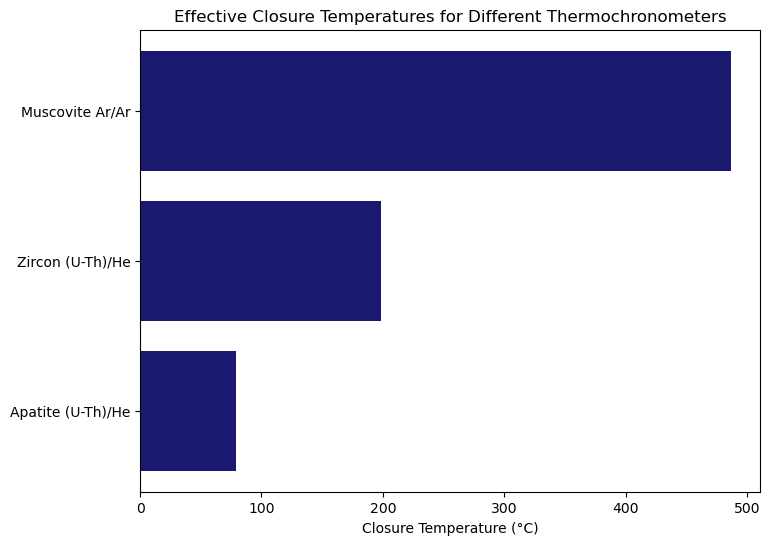

In [25]:
import matplotlib.pyplot as plt

# Create your plot below

# YOUR CODE HERE
# Thermochronometer parameters
thermochronometers = {
    'Apatite (U-Th)/He': {'activation_energy': 138.0e3, 'diffusivity_inf': 5.0e-3, 'grain_radius': 100.0, 'geometry_factor': 25},
    'Zircon (U-Th)/He': {'activation_energy': 168.0e3, 'diffusivity_inf': 4.6e-5, 'grain_radius': 100.0, 'geometry_factor': 25},
    'Muscovite Ar/Ar': {'activation_energy': 264.0e3, 'diffusivity_inf': 2.3e-4, 'grain_radius': 500.0, 'geometry_factor': 27}
}
# Cooling rate
cooling_rate = -10.0  # °C / Myr
# Calculate closure temperatures for each thermochronometer
closure_temps = {
    name: dodson(cooling_rate, **params)
    for name, params in thermochronometers.items()
}
# Names of thermochronometers
names = list(closure_temps.keys())
# Corresponding closure temperatures
temps = [closure_temps[name] for name in names]
# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# Create the horizontal bar plot
ax.barh(names, temps, color='midnightblue')
# Set the title and labels
ax.set_title('Effective Closure Temperatures for Different Thermochronometers')
ax.set_xlabel('Closure Temperature (°C)')
# Show the plot
plt.show()
#raise NotImplementedError()

**Figure Caption:** Comparison of effective closure temperatures calculated using Dodson's method for three different thermochronometers at a cooling rate of 10 °C/Myr. Muscovite Ar/Ar shows the highest closure temperature, reflecting its higher activation energy and larger grain size, followed by Zircon (U-Th)/He, with Apatite (U-Th)/He exhibiting the lowest closure temperature. The variations in closure temperatures indicate the sensitivity of each mineral system to thermal histories during the cooling process.

## Optional reflection questions (0 points)

We invite you to consider the following questions. Please answer them briefly in the Markdown cell below.

1. After looking at the results in Problem 1, what can you say about how higher diffusivity at higher temperature would affect trapping of a daughter isotope in a crystal?
2. How does the effect of a longer diffusion timescale compare to that of a higher diffusivity?
3. Does the effect of the cooling rate seem important in the calculation of effective closure temperatures? If you were given a rock sample with only an age, would it be easy to determine the closure temperature?
4. Is the effect of grain size important for thermochronology? Why or why not?

YOUR ANSWER HERE